# Clustering- Unsupervised Learning "y" YOK

In [30]:
import pandas as pd

In [31]:
df=pd.read_excel("cars.xls")

In [32]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#elbow method

In [34]:
x=df[["Price","Mileage","Cylinder"]]

In [35]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [36]:
model=KMeans(n_clusters=4) #kac kumeye ayirdigini yazar

In [37]:
model=model.fit(x)

In [38]:
prediction = model.predict(x)

In [39]:
prediction

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [40]:
x["cluster"]=prediction

C:\Users\melih\AppData\Local\Temp/ipykernel_23340/4088727760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=prediction


In [41]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,3


In [42]:
silhouette_score(x,prediction) #Kac kumeye bolersen bol sabit olursa

0.4127932036784607

In [43]:
import matplotlib.pyplot as plt

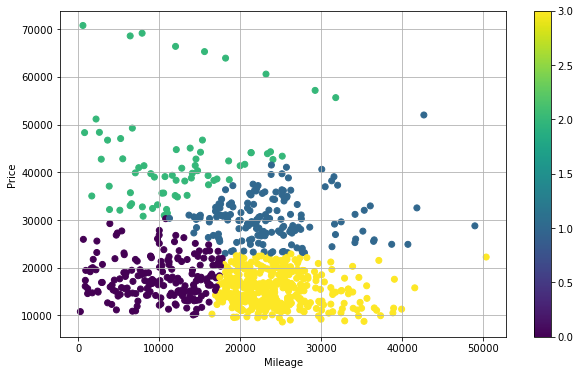

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=prediction);
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.colorbar()
plt.grid()

In [57]:
allscore=[]
allclusters=[]
distances=[]
def clust(howmany):
    for i in range(1,howmany):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        prediction=model.predict(x)
        score=silhouette_score(x,prediction)
        distance=model.inertia_
        print("Cluster ",i,"score",score)
        allscore.append(score)
        allclusters.append(i)
        distances.append(distance)
clust(20) 

Cluster  2 score 0.4517011866010777
Cluster  3 score 0.41321087476088764
Cluster  4 score 0.4127103067741065
Cluster  5 score 0.3552183362940295
Cluster  6 score 0.360282914574763
Cluster  7 score 0.35713347219960867
Cluster  8 score 0.3681047412319039
Cluster  9 score 0.3494446393195236
Cluster  10 score 0.35741340717043774
Cluster  11 score 0.3571804178784703
Cluster  12 score 0.35833920828874954
Cluster  13 score 0.3689518072045252
Cluster  14 score 0.35405134146482503
Cluster  15 score 0.3572305860226007
Cluster  16 score 0.36289105913437547
Cluster  17 score 0.3610972793634212
Cluster  18 score 0.3429676411423528
Cluster  19 score 0.35932133092020285
Cluster  20 score 0.3595053672597074


cluster 5 de durmamiz gerekiyor,ama 2 den basladigi icin 4 cunku sayi dusmeye basladi ve tekrarladi. Ucuz ve uzerinde az km (k) olan, ucuz uzerinde cok km, pahali ama az km, oahali ama cok km.

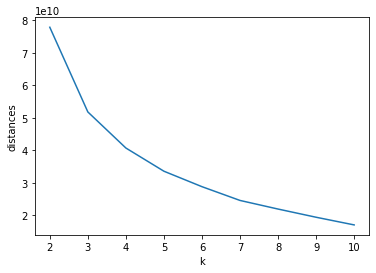

In [56]:
plt.xlabel("k")
plt.ylabel("distances")
plt.plot(allclusters,distances)

elbow methodunun gosterdigi uzere veriyi 4 farkli kumede toplamanin en ideal oldugunu dusunuyoruz.

In [61]:
df[df["Price"]>60000]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
